
## Computer Vision
### Module 4. Geometry and Augmented Reality
#### Task 4.3:

Calibrate a smartphone camera

1. Take 10-20 photos of calibration grid

2. Take a photo with long straight lines

3. Check if straight lines are really straight

4. Undistort photo

#### by Anastasiia Kasprova

    Link to Google Colab: https://colab.research.google.com/drive/1aZke8WZEJjiC4_GtI77c1gxK5rdA5wYR
    Link to github: https://github.com/kasprova/CV_UCU/tree/master/module4/tasks/task3



In [7]:
import numpy as np
import cv2
#from google.colab.patches import cv2_imshow
import os
from matplotlib import pyplot as plt
%matplotlib inline


# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

########################################Blob Detector##############################################

# Setup SimpleBlobDetector parameters.
blobParams = cv2.SimpleBlobDetector_Params()

# Change thresholds
blobParams.minThreshold = 30
blobParams.maxThreshold = 255

# Filter by Area.
blobParams.filterByArea = True
blobParams.minArea = 1364   # minArea may be adjusted to suit for your experiment
blobParams.maxArea = 160000   # maxArea may be adjusted to suit for your experiment

# Filter by Circularity
blobParams.filterByCircularity = True
blobParams.minCircularity = 0.4

# Filter by Convexity
blobParams.filterByConvexity = True
blobParams.minConvexity = 0.87

# Filter by Inertia
blobParams.filterByInertia = True
blobParams.minInertiaRatio = 0.01

# Create a detector with the parameters
blobDetector = cv2.SimpleBlobDetector_create(blobParams)


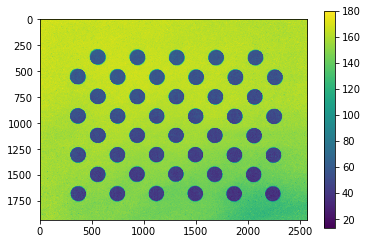

In [8]:
#display a sample of a marker
check_marker_img = cv2.imread('data/camera_calibration/img-01.jpg')
plt.imshow(cv2.cvtColor(check_marker_img, cv2.COLOR_BGR2GRAY))
plt.rcParams["figure.figsize"] = (15,10)
plt.colorbar()

In [9]:
#objects on marker board
objp = np.zeros((44, 3), np.float32)
for x in range(0, 11):
  for y in range(0, 4):
    objp[4*x+y] = (x*36, y*72 + (x%2)*36, 0)

In [10]:
#list of marker images
img_folder = "data/camera_calibration/"
img_list = os.listdir(img_folder)
img_list = [i for i in img_list if i!='.ipynb_checkpoints']
img_list

['img-01.jpg',
 'img-02.jpg',
 'img-03.jpg',
 'img-04.jpg',
 'img-05.jpg',
 'img-06.jpg',
 'img-07.jpg',
 'img-08.jpg',
 'img-09.jpg']

In [12]:
objpoints = None # 3d point in real world space
imgpoints = None # 2d points in image plane.
for i in img_list:
    img = cv2.imread(img_folder+i)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #keypoints = blobDetector.detect(gray)
    #im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    ret, corners = cv2.findCirclesGrid(gray, (4,11),
                          flags = cv2.CALIB_CB_ASYMMETRIC_GRID + cv2.CALIB_CB_CLUSTERING,
                                       blobDetector = blobDetector)   # Find the circle grid
    #cv2_imshow(im_with_keypoints)
    #print(keypoints)
    if corners is not None and ret:
        objpoints = np.array([objp]) if objpoints is None else np.append(objpoints, [objp], axis = 0)
        imgpoints = np.array([corners]) if imgpoints is None else np.append(imgpoints, [corners], axis = 0)
    else:
        print("Skip ", i)


print(objpoints.shape)
print(imgpoints.shape)
(i1, i2, i3, i4) = imgpoints.shape;
imgpoints = imgpoints.reshape([i1, i2, i4])
print(imgpoints.shape)
  
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print(mtx)
print(dist)

(9, 44, 3)
(9, 44, 1, 2)
(9, 44, 2)
[[8.92775406e+03 0.00000000e+00 1.96882023e+03]
 [0.00000000e+00 9.04968745e+03 9.02717602e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 4.59692776e-01  1.87268955e+01  3.30163257e-02  6.02534772e-02
  -3.76628680e+02]]


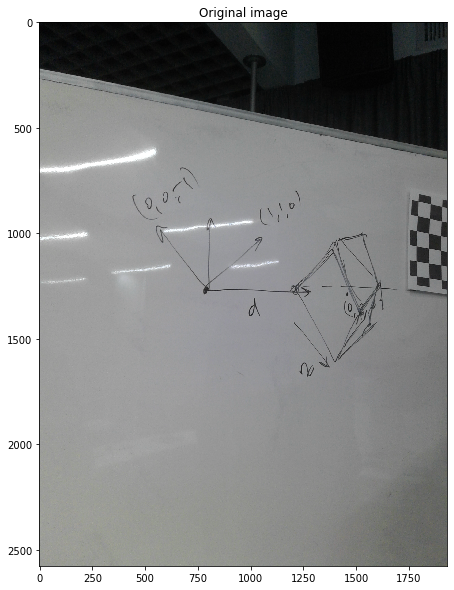

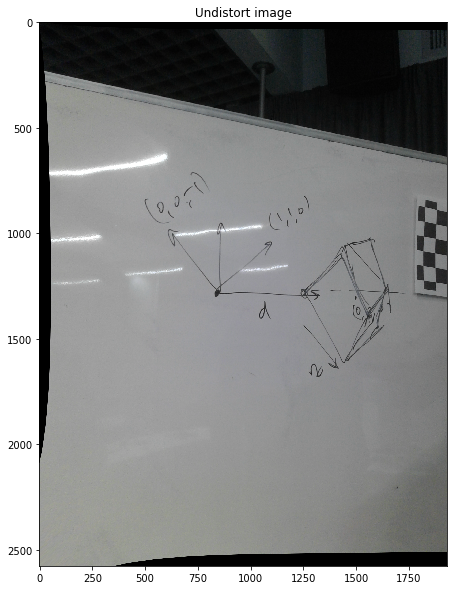

In [13]:
#dist = np.array([0,0,0,0,0])
test = cv2.imread("data/test_img.jpg")

(w,h) = test.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
dst = cv2.undistort(test, mtx, dist, None, newcameramtx)
#mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
#dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
#x,y,w,h = roi
#dst = dst[y:y+h, x:x+w]
#dst = cv2.resize(dst, (0,0), fx=0.25, fy=0.25) 

plt.figure(1)
plt.imshow(test)
plt.rcParams["figure.figsize"] = (15,10)
plt.title("Original image")

plt.figure(2)
plt.imshow(dst)
plt.rcParams["figure.figsize"] = (15,10)
plt.title("Undistort image")
plt.show()

#### Check if straight lines are straight

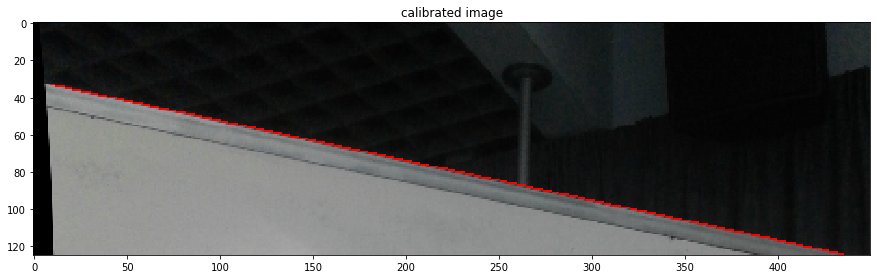

In [14]:
# crop the image
roi = 0,100,1800,500
x,y,w,h = roi
dst_croped = dst[y:y+h, x:x+w]
dst_croped = cv2.resize(dst_croped, (0,0), fx=0.25, fy=0.25) 
y1,x1,y2,x2 = 9,33,435,124
cv2.line(dst_croped,(y1,x1), (y2,x2), (255, 0, 0), 1)

plt.imshow(dst_croped)
plt.rcParams["figure.figsize"] = (15,10)
plt.title("calibrated image")
plt.show()

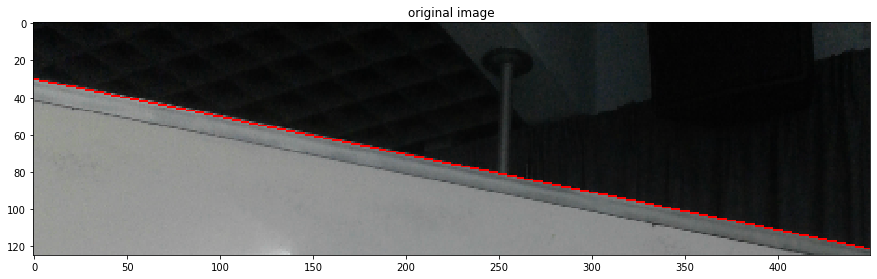

In [15]:
# crop the image
roi = 0,100,1800,500
x,y,w,h = roi
test_croped = test[y:y+h, x:x+w]
test_croped = cv2.resize(test_croped, (0,0), fx=0.25, fy=0.25) 
y1,x1,y2,x2 = 0,30,450,121
cv2.line(test_croped,(y1,x1), (y2,x2), (255, 0, 0), 1)

plt.imshow(test_croped)
plt.rcParams["figure.figsize"] = (15,10)
plt.title("original image")
plt.show()

#### Conclusion: There is no much difference of the test image before and after the camera calibration of my phone (at least cought by my eyes). Seems like Samsung RND department works well:)